## K-means 聚类
应用k-means算法到一个二维数据集，观察工作原理

In [268]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

In [269]:
data=loadmat('data/ex7data2.mat')
data_X1=data['X'][:,0]
data_X2=data['X'][:,1]

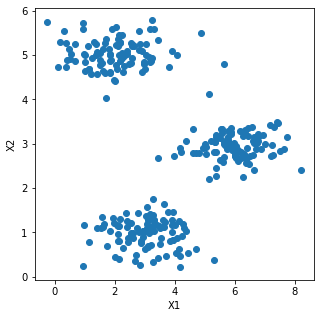

In [270]:
#可视化
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(data_X1,data_X2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

定义一个函数，找出数据中每个样本最接近的聚类中心

In [271]:
def findClosetCentroids(X,centroids):
    m=X.shape[0]
    k=centroids.shape[0]
    cidx=np.zeros(m)
    
    #遍历每个样本
    for i in range(m):
        min_distance=1000000
        #遍历每个聚类中心
        for j in range(k):
            distance=np.sum((X[i,:]-centroids[j])**2)
            if distance<min_distance:
                min_distance=distance
                cidx[i]=j
    return cidx

In [272]:
data=data['X']
#假设分成三类，每类的初试聚类中心
initial_centroids=np.array([[3,3],[6,2],[8,5]])

idx=findClosetCentroids(data,initial_centroids)
idx[:3]#返回前三个样本所属的类别索引

array([0., 2., 1.])

In [273]:
#画一下第一次聚类的效果
import pandas as pd
df=pd.DataFrame(data,columns=['X1','X2'])
df['cidx']=idx
df[:3]

,X1,X2,cidx
0,1.842080,4.607572,0.0
1,5.658583,4.799964,2.0
2,6.352579,3.290854,1.0


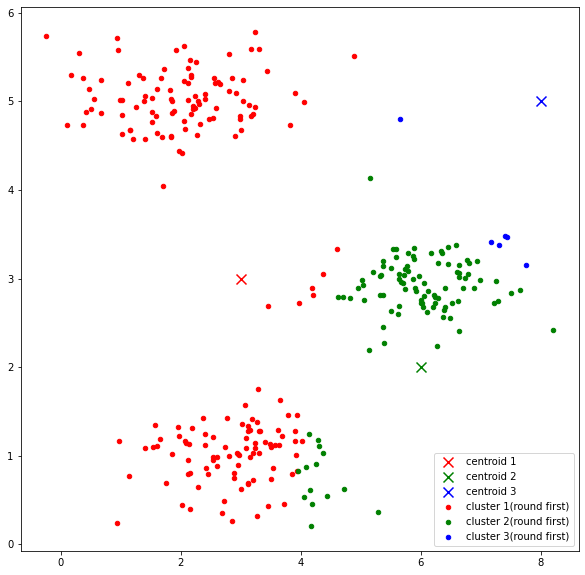

In [274]:
df_1=df[df['cidx'].isin([0.0])]
df_2=df[df['cidx'].isin([1.0])]
df_3=df[df['cidx'].isin([2.0])]

fig,ax=plt.subplots(figsize=(10,10))
#画初始中心
ax.scatter(initial_centroids[0][0],initial_centroids[0][1],s=100,marker='x',c='r',label='centroid 1')
ax.scatter(initial_centroids[1][0],initial_centroids[1][1],s=100,marker='x',c='g',label='centroid 2')
ax.scatter(initial_centroids[2][0],initial_centroids[2][1],s=100,marker='x',c='b',label='centroid 3')
#画出第一次聚类
ax.scatter(df_1['X1'],df_1['X2'],s=20,marker='o',c='r',label='cluster 1(round first)')
ax.scatter(df_2['X1'],df_2['X2'],s=20,marker='o',c='g',label='cluster 2(round first)')
ax.scatter(df_3['X1'],df_3['X2'],s=20,marker='o',c='b',label='cluster 3(round first)')

ax.legend(loc=4)
plt.show()

定义一个函数，重新计算聚类中心

In [275]:
def computeCentroids(X,cidx):
    m,n=X.shape
    k=len(np.unique(cidx))
    centroids=np.zeros((k,n))
    for i in range(k):
        indexes=np.where(cidx==i)
        #indexes要索引[0]才能取到列表
        #X本来是[[],[]...]形式的，但是一执行X[indexes,:]后变成了[[[],[]...]]]，所以axis=1
        centroids[i,:]=np.sum(X[indexes,:],axis=1)/len(indexes[0])
    return centroids

In [276]:
computeCentroids(data,idx)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

定义一个函数，执行k-means算法

In [277]:
def runKMeans(X,initial_centroids,max_iters):
    centroids=initial_centroids
    for i in range(max_iters):
        idx=findClosetCentroids(X,centroids)
        centroids=computeCentroids(X,idx)
    return idx,centroids

In [278]:
idx,centroids=runKMeans(data,initial_centroids,10)

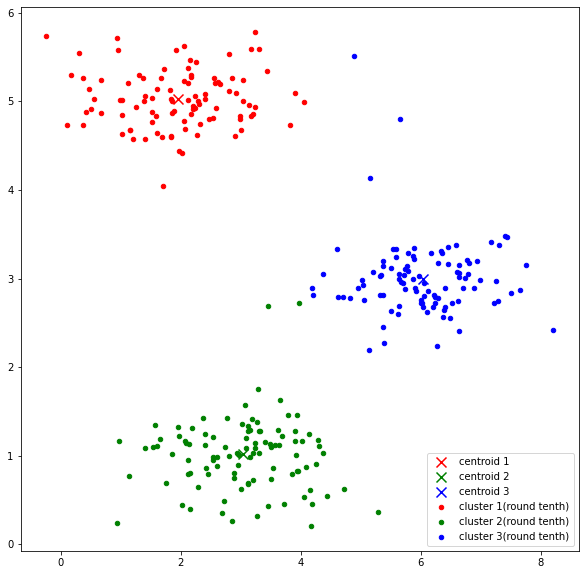

In [279]:
#继续利用前面的变量df进行可视化
df['cidx']=idx

df_1=df[df['cidx'].isin([0.0])]
df_2=df[df['cidx'].isin([1.0])]
df_3=df[df['cidx'].isin([2.0])]

fig,ax=plt.subplots(figsize=(10,10))
#画初始中心
ax.scatter(centroids[0][0],centroids[0][1],s=100,marker='x',c='r',label='centroid 1')
ax.scatter(centroids[1][0],centroids[1][1],s=100,marker='x',c='g',label='centroid 2')
ax.scatter(centroids[2][0],centroids[2][1],s=100,marker='x',c='b',label='centroid 3')
#画出第一次聚类
ax.scatter(df_1['X1'],df_1['X2'],s=20,marker='o',c='r',label='cluster 1(round tenth)')
ax.scatter(df_2['X1'],df_2['X2'],s=20,marker='o',c='g',label='cluster 2(round tenth)')
ax.scatter(df_3['X1'],df_3['X2'],s=20,marker='o',c='b',label='cluster 3(round tenth)')

ax.legend(loc=4)
plt.show()

还可以做一个改进：随机选择样本作为聚类中心

In [280]:
#定义一个随机选择样本作为聚类中心的函数
import random
def randInitialCentroids(X,k):
    #random.sample(seq, k)实现从序列或集合seq中随机选取k个独立的的元素
    rand_initial_centroids=np.array(random.sample(list(X),k))
    return rand_initial_centroids

In [281]:
randInitialCentroids(data,3)

array([[1.84207953, 4.6075716 ],
       [6.59702155, 3.07082376],
       [5.37293912, 2.81684776]])

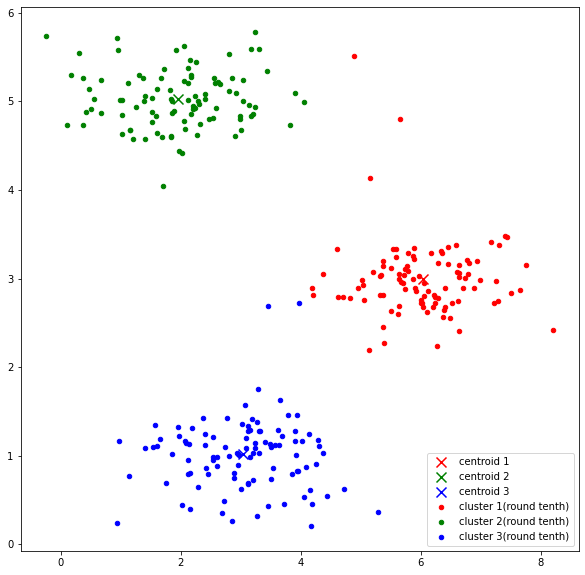

In [282]:
#随机选择样本作为聚类中心后再执行kmeans算法
initial_centroids=randInitialCentroids(data,3)
idx,centroids=runKMeans(data,initial_centroids,10)

#继续利用前面的变量df进行可视化
df['cidx']=idx

df_1=df[df['cidx'].isin([0.0])]
df_2=df[df['cidx'].isin([1.0])]
df_3=df[df['cidx'].isin([2.0])]

fig,ax=plt.subplots(figsize=(10,10))
#画初始中心
ax.scatter(centroids[0][0],centroids[0][1],s=100,marker='x',c='r',label='centroid 1')
ax.scatter(centroids[1][0],centroids[1][1],s=100,marker='x',c='g',label='centroid 2')
ax.scatter(centroids[2][0],centroids[2][1],s=100,marker='x',c='b',label='centroid 3')
#画出第一次聚类
ax.scatter(df_1['X1'],df_1['X2'],s=20,marker='o',c='r',label='cluster 1(round tenth)')
ax.scatter(df_2['X1'],df_2['X2'],s=20,marker='o',c='g',label='cluster 2(round tenth)')
ax.scatter(df_3['X1'],df_3['X2'],s=20,marker='o',c='b',label='cluster 3(round tenth)')

ax.legend(loc=4)
plt.show()

使用kmeans算法对图像进行压缩，利用聚类找到最具代表性的少数颜色

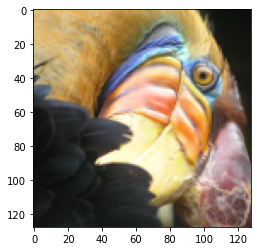

In [283]:
import cv2 as cv
img=cv.imread('data/bird_small.png')#注意img通道是bgr
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)#转换成rgb
plt.imshow(img)#以rgb方式显示图像

In [284]:
#读取图像数据
img_data=loadmat('data/bird_small.mat')
img_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [285]:
img_data=img_data['A']
img_data.shape

(128, 128, 3)

像素128*128，3对应rgb三个通道的像素值

In [286]:
#归一化预处理
img_data=img_data/255
#转换为二维数组
img_data_rgb=np.reshape(img_data,(img_data.shape[0]*img_data.shape[1],img_data.shape[2]))
img_data_rgb

array([[0.85882353, 0.70588235, 0.40392157],
       [0.90196078, 0.7254902 , 0.45490196],
       [0.88627451, 0.72941176, 0.43137255],
       ...,
       [0.25490196, 0.16862745, 0.15294118],
       [0.22745098, 0.14509804, 0.14901961],
       [0.20392157, 0.15294118, 0.13333333]])

In [287]:
#随机选取16个rgb值作为聚类中心
initial_centroids=randInitialCentroids(img_data_rgb,16)
initial_centroids

array([[0.57254902, 0.41568627, 0.16862745],
       [0.36862745, 0.22745098, 0.21176471],
       [0.41568627, 0.26666667, 0.12156863],
       [0.09411765, 0.09411765, 0.09411765],
       [0.1372549 , 0.14509804, 0.1254902 ],
       [0.8627451 , 0.69019608, 0.39607843],
       [0.18039216, 0.19215686, 0.16470588],
       [0.67058824, 0.6       , 0.29803922],
       [0.0745098 , 0.07058824, 0.07843137],
       [0.72156863, 0.5254902 , 0.25882353],
       [0.97647059, 0.71764706, 0.39607843],
       [0.15686275, 0.18431373, 0.19607843],
       [0.0745098 , 0.08627451, 0.08627451],
       [0.12156863, 0.16078431, 0.15686275],
       [0.10588235, 0.09803922, 0.09411765],
       [0.09411765, 0.1254902 , 0.1254902 ]])

In [288]:
idx,centroids=runKMeans(img_data_rgb,initial_centroids,10)

原理大概是，原本图像为128x128x3三通道的rgb图像，我们之前所写的代码处理的数据都是二维数组，因此我们需要把三通道的图像（也就是三维数组）转换为二维数组。元素中的数值分别对应归一化的rgb值。  
1. 首先我们需要从这16384个rgb值中随机选择16个作为聚类中心，也就是颜色的代表
2. 随后我们计算每个像素的rgb值到这16个聚类中心的“距离”，于是像素就根据颜色被分成了16类
3. 然后我们计算所分得的每一类rgb的平均值，作为新的聚类中心，也就是新的颜色代表
4. 重复步骤2-3，直到最大迭代次数

In [289]:
#和参考代码效果是一样的，但是参考代码的写法更高级
img_compress=np.zeros_like(img_data_rgb)
for i in range(len(idx)):
    #归一化的时候除过一次255
    #这里没有乘回去255是因为后续plt.imshow画RGB图的时候，传参是0-1之间的flot和传0-255的int效果是一样的
    img_compress[i]=centroids[int(idx[i])]
img_compress.shape

(16384, 3)

In [290]:
img_compress=np.reshape(img_compress,(img_data.shape[0],img_data.shape[1],img_data.shape[2]))
img_compress.shape

(128, 128, 3)

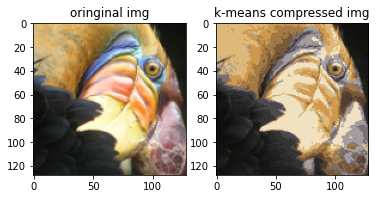

In [291]:
ax1=plt.subplot(1,2,1)
plt.imshow(img)
ax1.set_title('oringinal img')

ax2=plt.subplot(1,2,2)
plt.imshow(img_compress)
ax2.set_title('k-means compressed img')

plt.show()

尝试用scikit-learn库实现kmeans

In [292]:
from skimage import io
from sklearn.cluster import KMeans

(128, 128, 3)

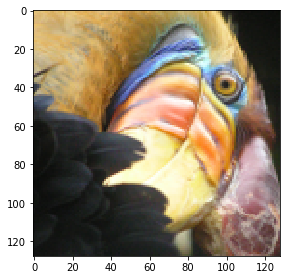

In [293]:
img=io.imread('data/bird_small.png')/255
io.imshow(img)
img.shape

In [294]:
img_data=img.reshape(128*128,3)
img_data.shape

(16384, 3)

In [295]:
#n_clusters：int型，生成的聚类数，默认为8
#n_init：int型，用不同的聚类中心初始化值运行算法的次数，最终解即是最优结果。 默认值为10
#n_jobs：int型。指定计算所用的进程数。内部原理是同时进行n_init指定次数的计算。
#       若值为 -1，则用所有的CPU进行运算。
model=KMeans(n_clusters=16,n_init=100,n_jobs=-1)

In [296]:
model.fit(img_data)

D:\Software\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [297]:
centroids=model.cluster_centers_
idx=model.predict(img_data)
centroids.shape,idx.shape

((16, 3), (16384,))

In [298]:
img_compress=np.zeros_like(img_data)
for i in range(len(idx)):
    img_compress[i]=centroids[int(idx[i])]
img_compress.shape

(16384, 3)

In [299]:
img_compress=img_compress.reshape(128,128,3)

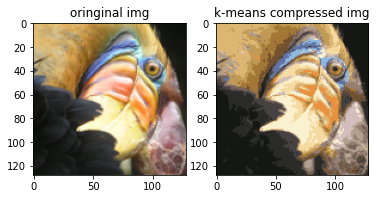

In [300]:
ax1=plt.subplot(1,2,1)
plt.imshow(img)
ax1.set_title('oringinal img')

ax2=plt.subplot(1,2,2)
plt.imshow(img_compress)
ax2.set_title('k-means compressed img')

plt.show()

## Principal component analysis（主成分分析）

In [301]:
data=loadmat('data/ex7data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

(50, 2)


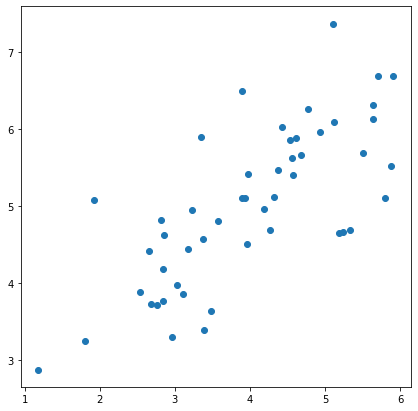

In [302]:
data=data['X']
print(data.shape)
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(data[:,0],data[:,1])
plt.show()

**PCA步骤:**
1. 归一化
2. 计算协方差矩阵
3. 计算协方差矩阵的特征向量（可以用奇异值分解求解）

In [306]:
def pca(X):
    m=X.shape[0]
    
    #归一化
    #我认为参考代码有问题，标准化应当是针对每一列而非整个矩阵的
    X=(X-X.mean(axis=0))/X.std(axis=0)
    
    #计算协方差矩阵(n x n)
    X=np.matrix(X)
    cov=(X.T*X)/m
    
    #利用奇异值分解求解
    U,S,V=np.linalg.svd(cov)
    
    return U,S,V

In [307]:
U,S,V=pca(data)
U,S,V

(matrix([[-0.70710678, -0.70710678],
         [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 matrix([[-0.70710678, -0.70710678],
         [-0.70710678,  0.70710678]]))

In [308]:
#把数据投影到低维空间
def projectData(X,U,k):
    U_reduce=U[:,:k]
    Z=X*U_reduce
    return Z

In [309]:
Z=projectData(data,U,1)
Z

matrix([[-4.78759045],
        [-7.34122042],
        [-4.99760204],
        [-4.58251038],
        [-4.96535088],
        [-7.33909864],
        [-5.02657745],
        [-8.90393595],
        [-6.38329374],
        [-7.20197778],
        [-7.05107253],
        [-6.95290959],
        [-6.4674726 ],
        [-7.00429773],
        [-4.66963233],
        [-8.4480763 ],
        [-7.3196659 ],
        [-5.28701594],
        [-8.81999314],
        [-6.95020407],
        [-8.75989905],
        [-5.92729807],
        [-8.315444  ],
        [-6.33065452],
        [-4.54033809],
        [-5.77450612],
        [-7.69650922],
        [-7.70841907],
        [-5.39933015],
        [-6.35631705],
        [-6.53101334],
        [-8.06183103],
        [-4.92218554],
        [-7.0797285 ],
        [-5.61499734],
        [-7.8001156 ],
        [-4.53023245],
        [-7.90528254],
        [-3.56709632],
        [-6.67057627],
        [-7.38689297],
        [-5.3854378 ],
        [-4.95846894],
        [-7

In [310]:
#数据恢复
def recoverData(Z,U,k):
    U_reduce=U[:,:k]
    X=Z*U_reduce.T
    return X

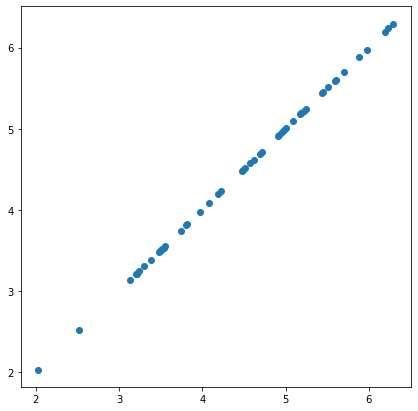

In [316]:
data_recover=recoverData(Z,U,1)
data_recover=np.array(data_recover)#matrix对象转换成array对象

fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(data_recover[:,0],data_recover[:,1])
plt.show()

接下来我们将利用PCA对图像进行降维

In [321]:
faces=loadmat('data/ex7faces.mat')
faces=faces['X']
faces.shape

(5000, 1024)

5000张32x32像素的人脸照片

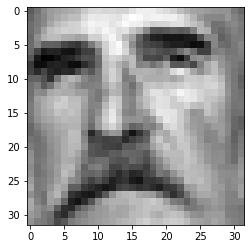

In [360]:
#随机显示一张
rand_int=random.randint(0,5000)
face=np.reshape(faces[rand_int,:],(32,32)).T
plt.imshow(face,cmap=plt.cm.gray)
plt.show()

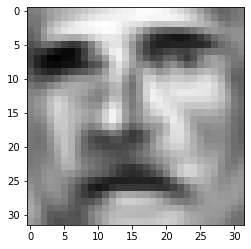

In [362]:
U,S,V=pca(faces)
#1024维降为100维
Z=projectData(faces,U,100)
#恢复
faces=recoverData(Z,U,100)
face=np.reshape(faces[rand_int,:],(32,32)).T
plt.imshow(face,cmap=plt.cm.gray)
plt.show()

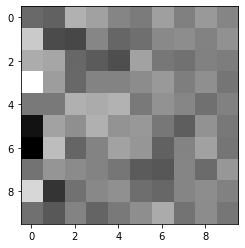

In [364]:
#有点好奇1024维被压缩成100维是什么样子的...
Z_test=np.reshape(Z[rand_int,:],(10,10)).T
plt.imshow(Z_test,cmap=plt.cm.gray)
plt.show()